# Lista de aristas doblemente conectadas
## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Clases Inciales
### 1. Clase vertice

In [26]:
class vertex:
    def __init__(self, x , y, name):
        self.x = x
        self.y = y
        self.name = name
        self.edge_inci = None

    def add_edge_inci(self,e):
        self.edge_inci = e

### 2. Clase Arista

In [39]:
class half_edge:
    def __init__(self,start,end,name):
        self.oringe = start #Origen
        self.queue = end #final
        self.name = name #nombre
        self.next = None #Siguiente
        self.prev = None #Previo
        self.face = None #Cara incidente
        self.twin = None # Gemelo

    def add_next(self,n):
        self.next = n #Siguiente
    
    def add_prev(self,pv):
        self.prev = pv #Previo

    def add_face(self,f):
        self.face = f #Cara incidente    

    def add_twin(self,t):
          self.twin = t # Gemelo

## Clase Cara

In [36]:
class face:
    def __init__(self,n):
        self.name = n #Nombre
        self.exterior = None #frontera exterior
        self.interior = None #frontera interior

# Generar vertices y segmentos

Realizar dos funciones en las cuale pueda generar una lista de vertices que ya tengan la clase VERTEX y otra lista que ya tenga la clase EDGE

In [4]:
# Input: Ingreso la lista de los puntos del poligono (Organizado)
# Output: Sale una lista de objetos vertex los cuales tienen [vertex(x,y, name)]
def general_vertex(P):
    list_vertex = []
    for i in range(len(P)):
        name = "V"+str(i+1)
        v = vertex(P[i][0],P[i][1], name)
        list_vertex.append(v)
    return list_vertex

In [5]:
# Input: Ingresas una lista de vertices y la cara a la que pertenecen
# Output: Sale una lista de objeto de [half_edge(V[i], V[i+1], name_edge)]
def general_edge(P, face):
    list_half_edge = []
    for i in range(len(P)):
        name_edge = 'e'+str(i+1)+','+ face
        if i == (len(P)-1):
            e = half_edge(P[i], P[0], name_edge)
        else: 
            e = half_edge(P[i], P[i+1], name_edge)

        list_half_edge.append(e)  
    return list_half_edge 

In [6]:
def general_dataFRame(lists,columns):
    df = pd.DataFrame()
    for i in range(len(columns)):
        df[columns[i]] = lists[i]
    return df 

## Conceptos
* **Arista incidente:** Si un vértice es el punto final de una arista, entonces
decimos que el vértice y la arista son incidentes
* Una cara y una arista de su frontera son incidentes, y una cara y un vértice de su frontera son incidentes.
* Una lista de aristas doblemente conectadas contiene una lista por caras, nodos y semi-aristas.
* Recorrer una cara en el sentido contrario a las agujas del reloj.
* Si una semi-aristae tiene v como origen y w como destino, entonces su gemela Twin(e) tiene w como origen y v como destino.
* Para llegar al límite de una cara basta con almacenar un puntero en el registro de caras a una media arista arbitraria que delimite la cara.
* **límites de los agujeros de una cara:** si se recorren en sentido contrario a las agujas del reloj, la cara queda a la derecha.
* Another consequence is that twin half-edges always have opposite orientations
* Frontera interior giro en sentido antihorario
* Frontera exterior giro en setido horario


## Lista de Nodos
La lista de nodos contienen, inicialmente las coordenadas del punto (V), defino una semi- arista incidente.
* The vertex record of a vertex v stores the coordinates of v in a field called
Coordinates(v). It also stores a pointer IncidentEdge(v) to an arbitrary
half-edge that has v as its origin.

## Lista de Caras
* The face record of a face f stores a pointer OuterComponent( f ) to some
half-edge on its outer boundary. For the unbounded face this pointer is nil.
It also stores a list InnerComponents( f ), which contains for each hole in
the face a pointer to some half-edge on the boundary of the hole.
# Lista de Semi aristas
* The half-edge record of a half-edge e stores a pointer Origin(e) to its origin,
a pointer Twin(e) to its twin half-edge, and a pointer IncidentFace(e) to
the face that it bounds. We don’t need to store the destination of an edge,
because it is equal to Origin(Twin(e)). The origin is chosen such that 
IncidentFace(e) lies to the left of e when it is traversed from origin to
destination. The half-edge record also stores pointers Next(e) and Prev(e)
to the next and previous edge on the boundary of IncidentFace(e). Thus
Next(e) is the unique half-edge on the boundary of IncidentFace(e) that has
the destination of e as its origin, and Prev(e) is the unique half-edge on the
boundary of IncidentFace(e) that has Origin(e) as its destination. 

In [28]:
# Input: List of sorted vertex, list sorted edge 
# Output: List of vetex with coordinates of v and incident edge. better vizualization is with DATAFRAME 
def list_vertex(P,le):
    #list_vertex = []
    name_vertex =[]
    lis = []
    lis_all = []
    half_edge_list = []
    for i in range(len(P)):
        name_vertex.append(P[i].name)
        if P[i].name == le[i].oringe.name:
            P[i].add_edge_inci(le[i])
            half_edge = le[i].name
        half_edge_list.append(half_edge)
        lis.append([P[i].x,P[i].y])
        #list_vertex.append([P[i],half_edge])
    lis_all.append(name_vertex)
    lis_all.append(lis)
    lis_all.append(half_edge_list)
    df = general_dataFRame(lis_all, ['Vertice','Coordenada','Semi_arista'])
      
    return P,df


In [38]:
#Input: Ingreso la list arista
#Output: Sale la list arista gemela - Notación de la arista gemela es 'ei2'
def twin(list_e):
    list_twin = []
    twins_sorted =[]
    for i in range(len(list_e)):
        name_twin_edge = 'e'+str(i+1)+',2'
        e_twin = half_edge(list_e[i].queue,list_e[i].oringe,name_twin_edge)
        list_e[i].add_twin(e_twin)
        list_twin.append(e_twin)

    #Organizo de forma horaria
    origen = list_twin[0].queue
    a = True
    while(a != False):
        edge_next = [i for i in list_twin  if i.oringe == origen]
        twins_sorted.append(edge_next[0])
        origen = edge_next[0].queue
        if len(twins_sorted) == len(list_twin):
            a = False
    
    return list_e, twins_sorted


In [40]:
def prev(lst):
    list_prev = [] # Guardaremos el listado de las artistas previas, por su nombre 'eij' i-Arista j-cara
    for i in range(len(lst)):
        if i == 0:
            list_prev.append(lst[len(lst)-1])
            lst.add_prev(lst[len(lst)-1])
        else:
            list_prev.append(lst[i-1])
            lst.add_prev(lst[i-1])
    return lst, list_prev

In [41]:
def next(lst):
    list_next = [] #Guardaremos el listado de las semi-aristas siguientes, por su nombre 'eij' i-Arista j-cara
    for i in range(len(lst)):
        if i == len(lst)-1:
            list_next.append(lst[0])
            lst.add_next(lst[0])
        else:
            list_next.append(lst[i+1])
            lst.add_next(lst[i+1])
    return lst,list_next

In [11]:
#Input: Entra una lista de semi-aristas con sus gemelos
#Outpu: Salir una lista de el nombre del origen de las aristas
def origen(lst):
    list_ori = []
    for i in lst:
        list_ori.append(i.oringe)
    return list_ori

In [12]:
def name_edge(lst):
    list_name_edge = []
    for i in lst:
        list_name_edge.append(i.name)
    return list_name_edge

In [13]:
def r_orden(p,q):
    if p.y > q.y:
        point = p
    elif p.y == q.y:
        if p.x < q.x:
            point = p
        else:
            point = q
    else:
        point = q
    return point

In [14]:
# Puntos del poligono
# punto más a la izquierda y arriba
def p_up(P):
    p = P[0]
    for i in range(len(P)):
        if P[i] == p:
            p=r_orden(p , P[i+1])
        else:
            p=r_orden(p , P[i])
    return p


In [15]:
#Recorrido de una frontera para asignarle una cara
def ciclos(twin,prev_t,next,ledge, p_up):
    
    for i in ledge:
        if p_up == i.oringe:
            idex = ledge.index(i)

    for i in twin:
        if p_up == i.queue:
            idex1 = twin.index(i)

    
    cicle_e = []
    cicle_e.append(ledge[idex])
    punto_siguiente = ledge[idex].queue
    a = False
    while(a != True):
        edge_next = [i for i in next if i.oringe == punto_siguiente]
        edge = edge_next[0]  
        if edge not in cicle_e:
            cicle_e.append(edge)
            punto_siguiente = edge.queue
        else:
            a = True
    
    cicle_t = []
    cicle_t.append(twin[idex1])
    punto_anterior = twin[idex1].oringe
    a = False
    while(a != True):
        edge_prev = [i for i in prev_t if i.queue == punto_anterior]
        edge = edge_prev[0]  
        if edge not in cicle_t:
            cicle_t.append(edge)
            punto_anterior = edge.oringe
        else:
            a = True
    
    


    return cicle_e,cicle_t


In [16]:
# P0 : Punto de origen arista 1
# P1 : Punto de final arista 1 y punto de origen arista 2
# P2 : Punto de final de arista 2
def Producto_Cruz(P0,P1,P2):
    d = ((P1.x-P0.x)*(P2.y-P0.y))-((P2.x-P0.x)*(P1.y-P0.y))
    return d

In [17]:
# P0 : Punto de origen arista 1
# P1 : Punto de final arista 1 y punto de origen arista 2
# P2 : Punto de final de arist
def orientacion(P0,P1,P2):
    d = Producto_Cruz(P0,P1,P2)
    if d>0:
        a = True
        print("P2 se hace un giro en sentido antihoraro de P1")
    else:
        a = False
        print("P2 esta girando en sentido horario de P1")
    return a 

In [18]:
def assigment_face(ciclo):
    face = []
    for i in range(len(ciclo)):
        face.append('f'+ciclo[i].name[3])
    return face

In [19]:
# a = True frontera interior
# a = False frontera exterior
def fronter_exterior(ciclo):
    a = orientacion(ciclo[0].oringe,ciclo[1].oringe,ciclo[1].queue)
    exterior = None
    interior = None
    name = assigment_face(ciclo)
    name = name[0]
    if a == True:
        interior = ciclo[0].name
        print('Las aristas que conformar dicho ciclo son frontera de cara interior')
    else:
        exterior =ciclo[0].name 
        print('Las aristas que conformar dicho ciclo son frontera de cara exterior')
    return exterior,interior,name

In [20]:
def incidentface(next_e,prev_t,twins,ledge,v):
   #Primero encuentro el punto más arriba y a la izquierda del poligono
   point = p_up(v)
   # Luego iniio el recorrido con este punto.
   c_e,c_t = ciclos(twins,prev_t,next_e,ledge,point)
   lst_f = assigment_face(c_e)
   lst_f2 =  assigment_face(c_t)
   lst_face = lst_f + lst_f2
   return lst_face

   

In [21]:
#Input: Ingresar lista de aristas ordenadas
def list_half_edge(le,v):# Primero hago una lista de todas las aristas y las nombro 'ei1'(le)
    le,list_twin = twin(le) #Lista de aristas gemelas y la nombramos 'ei2'
    list_whole_edge = le+list_twin # listado de todas las aristas con sus aristas gemelas
    le,list_prev_e = prev(le) # Listado de las aristas previas para las semi-aristas 
    list_twin,list_prev_t = prev(list_twin) # Listado de las aristas previas para las semi-aristas gemelas
    le,list_next_e = next(le) # Listado de las aristas siguientes para las semi-aristas 
    list_twin,list_next_t = next(list_twin) # Listado de las aristas siguientes para las semi-aristas gemelas 
    list_origin = origen(list_whole_edge) #Listado de los vertices de origen
    ## ARREGLAR ICFACE
    list_incFace = incidentface(list_next_e,list_prev_t ,list_twin,le,v) #Listado de caras incidentes
    lst_edge_name = name_edge(list_whole_edge)
    lst_prev_name = name_edge(list_prev_e+list_prev_t)
    lst_next_name = name_edge(list_next_e+list_next_t)
    lst_origen_name = name_edge(list_origin)
    df = general_dataFRame([lst_edge_name,lst_origen_name,lst_next_name,
                      lst_prev_name,list_incFace], ['Semi_arista','Origen',
                                                                 'Next', 'Prev', 'Face'])
    
    return df



In [22]:
def list_face(le,v):
    twins = twin(le) #Lista de aristas gemelas y la nombramos 'ei2'
    next_e = next(le) # Listado de las aristas siguientes para las semi-aristas 
    prev_t = prev(twins) # Listado de las aristas previas para las semi-aristas gemelas
    point = p_up(v)
    # Luego iniio el recorrido con este punto.
    #Arreglar tambien
    c_e,c_t= ciclos(twins,prev_t,next_e,le,point)
    ext_e, inter_e,cara_e = fronter_exterior(c_e)
    ext_t, inter_t,cara_t = fronter_exterior(c_t)
    face = [cara_e,cara_t]
    ext = [ext_e,ext_t]
    inter = [inter_e,inter_t]
    df = general_dataFRame([face,ext,inter],["Face","Exterior","Interior"])
    return df

    

Codigo basado en el siguiente poligono:
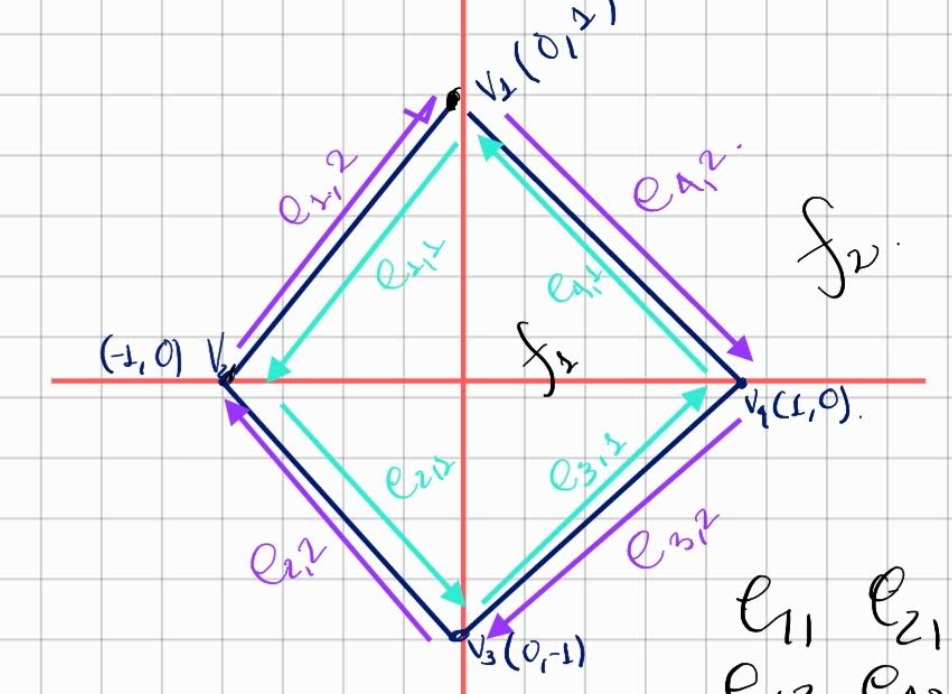

In [35]:
P  = [[0,1], [-1,0],[0,-1],[1,0]]
ls = general_vertex(P) #genera los vertex en objetos
lf = general_edge(ls,'1') #Genera las aristas en objetos
l1, df = list_vertex(ls,lf) #Sale la lista de vertices, para visualizar mejor vemos el dataframe df.
#l1 es una lista de objetos vertice que cumplen con las caracteristicas(nombre,coordenada,arista incidente(objeto arista))
df.head() # Solo para visualizar


,Vertice,Coordenada,Semi_arista
0,V1,"[0, 1]","e1,1"
1,V2,"[-1, 0]","e2,1"
2,V3,"[0, -1]","e3,1"
3,V4,"[1, 0]","e4,1"


In [32]:
for i in range(len(l1)):
    print(l1[i].edge_inci.name)

e1,1
e2,1
e3,1
e4,1


In [33]:
list_half_edge(lf,l1)


,Semi_arista,Origen,Next,Prev,Face
0,"e1,1",V1,"e2,1","e4,1",f1
1,"e2,1",V2,"e3,1","e1,1",f1
2,"e3,1",V3,"e4,1","e2,1",f1
3,"e4,1",V4,"e1,1","e3,1",f1
4,"e4,2",V1,"e3,2","e1,2",f2
5,"e3,2",V4,"e2,2","e4,2",f2
6,"e2,2",V3,"e1,2","e3,2",f2
7,"e1,2",V2,"e4,2","e2,2",f2


In [34]:
df = list_face(lf,l1)
df.head()

P2 se hace un giro en sentido antihoraro de P1
Las aristas que conformar dicho ciclo son frontera de cara interior
P2 esta girando en sentido horario de P1
Las aristas que conformar dicho ciclo son frontera de cara exterior


,Face,Exterior,Interior
0,f1,None,"e1,1"
1,f2,"e1,2",None
